X_trainの形状： (404, 13) y_trainの形状： (404,) X_testの形状： (102, 13) y_testの形状： (102,)
傾き： [-0.97082019  1.05714873  0.03831099  0.59450642 -1.8551476   2.57321942
 -0.08761547 -2.88094259  2.11224542 -1.87533131 -2.29276735  0.71817947
 -3.59245482]
切片： 22.611881188118836
MSE train： 19.33, test： 33.45
MSE train： 19.33, test：33.45


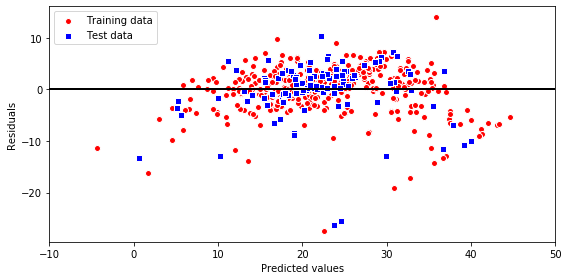

In [1]:
# 重回帰線予測モデル
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep="\s+")
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
pd.DataFrame(df.head())

# すべての特徴量を選択
X = df.iloc[:, 0:13].values
# 正解に住宅価格を設定
y = df['MEDV'].values
X[:3], y[:3]
# 訓練データとテストデータに分割、random_stateで分割データを固定
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('X_trainの形状：', X_train.shape, 'y_trainの形状：', y_train.shape, 'X_testの形状：', X_test.shape, 'y_testの形状：', y_test.shape)
# StandardScalerで特徴量を標準化
sc = StandardScaler()
# 訓練データで標準化モデルを作成し変換
X_train_std = sc.fit_transform(X_train)
# 作成した標準化モデルでテストデータを変換
X_test_std = sc.transform(X_test)
# 標準化された訓練データ
X_train_std[0]
# 線形回帰モデルを作成
model = LinearRegression()
# モデルの訓練
model.fit(X_train_std, y_train)
print('傾き：', model.coef_) # なんで _ なの？
print('切片：', model.intercept_)

# 訓練データ、テストデータの住宅価格を予測
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)
# MSEの計算
print('MSE train： %.2f, test： %.2f' % (
    np.mean((y_train - y_train_pred) ** 2),
    np.mean((y_test - y_test_pred) ** 2)
))

# 正解の住宅価格と予測の住宅価格の差をMSEを計算
print('MSE train： %.2f, test：%.2f' % (
    mean_squared_error(y_train, y_train_pred),
    mean_squared_error(y_test, y_test_pred)
))

# 残差プロット
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred, y_train_pred - y_train,
            c='red', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,
            c='blue', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()